In [100]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [101]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df.drop(['PassengerId','Name','Ticket'], axis=1,inplace=True)

In [103]:
path = 'train.csv'
def read_file(path):
    df = pd.read_csv(path)
    return df.head()
read_file(path)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
from read_files import read_file
path = 'G:/DEPI/Depi_Amit_AI_BNS3/Sources/DataBase/Data_preprocessing/train.csv'
read_file(path)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
dtypes = df.dtypes
n_unique = df.nunique()
# n_unique
pd.DataFrame({"Dtypes":dtypes, "Num_uniques":n_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,int64,int64,object,float64,int64,int64,float64,object,object
Num_uniques,2,3,2,88,7,7,248,147,3


In [106]:
from process import chk_types
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,int64,int64,object,float64,int64,int64,float64,object,object
Num_uniques,2,3,2,88,7,7,248,147,3


In [107]:
cols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
df[cols] = df[cols].astype('category')
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtypes":dtypes, "Num_uniques":n_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,category,category,category,float64,category,category,float64,object,category
Num_uniques,2,3,2,88,7,7,248,147,3


In [108]:
cols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']

def change_type(user_cols):
    df[user_cols] = df[user_cols].astype('category')
    # chk_types(df)
    dtypes = df.dtypes
    n_unique = df.nunique()
    pd.DataFrame({"Dtypes":dtypes, "Num_uniques":n_unique}).T

In [109]:
null = df.isnull().sum()
ratio = (null/df.shape[0])*100
pd.DataFrame({"Null_sum":null,"Ratio %": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null_sum,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio %,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [110]:
def null_ratio(df):
    null = df.isnull().sum()
    ratio = (null/df.shape[0])*100
    return pd.DataFrame({"Null_sum":null,"Ratio %": ratio}).T

In [111]:
df1 = df.dropna(subset=['Embarked'], inplace= True)
df2 = df.drop("Cabin", axis=1, inplace= True)

In [112]:
median =  df['Age'].median()
df['Age'].fillna(median, inplace= True)

In [113]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [114]:
null = df.isnull().sum()
ratio = round( (null /df.shape[0])*100 ,2).astype(str) +"%"
pd.DataFrame({"Null_sum": null, "Ratio %": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null_sum,0,0,0,0,0,0,0,0
Ratio %,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
num_col = df.select_dtypes('number').columns
num_col

Index(['Age', 'Fare'], dtype='object')

In [117]:
plt.figure(figsize=(8,1))
plt.show()

<Figure size 800x100 with 0 Axes>

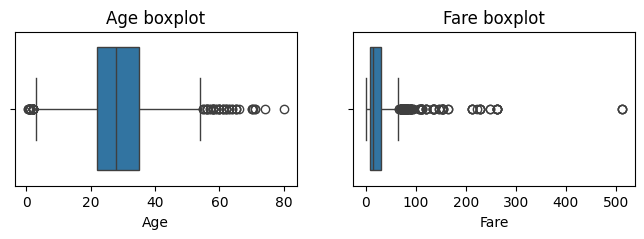

In [118]:
plt.figure(figsize=(8,2))
for i, col in enumerate(num_col):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient="h")
    plt.title(f"{col} boxplot")

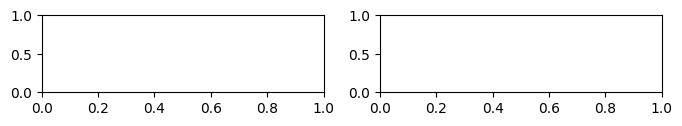

In [119]:
plt.figure(figsize=(8, 1))
for i in enumerate(num_col):
    plt.subplot(1, len(num_col), i[0]+1)

In [120]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR

    lower_outliers = df[df[col] < lower_fence][col].values
    upper_outliers = df[df[col] > upper_fence][col].values

    df[col].replace(lower_outliers, lower_fence,inplace=True)
    df[col].replace(upper_outliers, upper_fence,inplace=True)

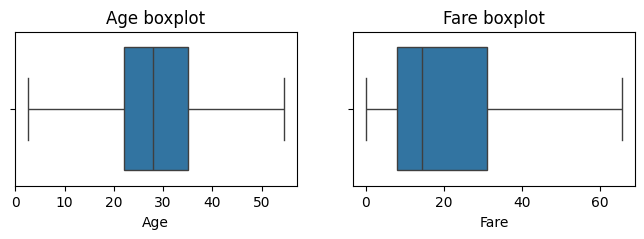

In [121]:
plt.figure(figsize=(8,2))
for i, col in enumerate(num_col):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient="h")
    plt.title(f"{col} boxplot")

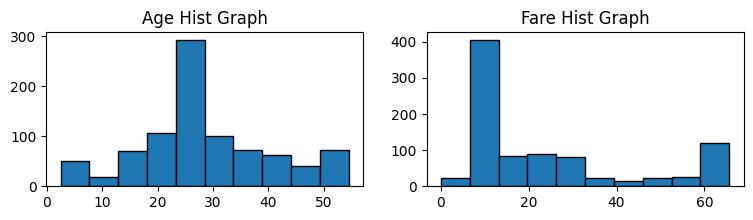

In [122]:
plt.figure(figsize=(9,2))
for i, col in enumerate(num_col):
    plt.subplot(1,2,i+1)
    plt.hist(df[col], edgecolor ="black")
    plt.title(f"{col} Hist Graph")

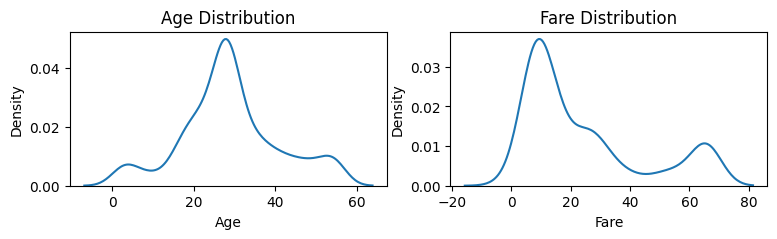

In [123]:
plt.figure(figsize=(9,2))
for i, col in enumerate(num_col):
    plt.subplot(1,2,i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col} Distribution")

In [124]:
cat_cols = df.select_dtypes('category').columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

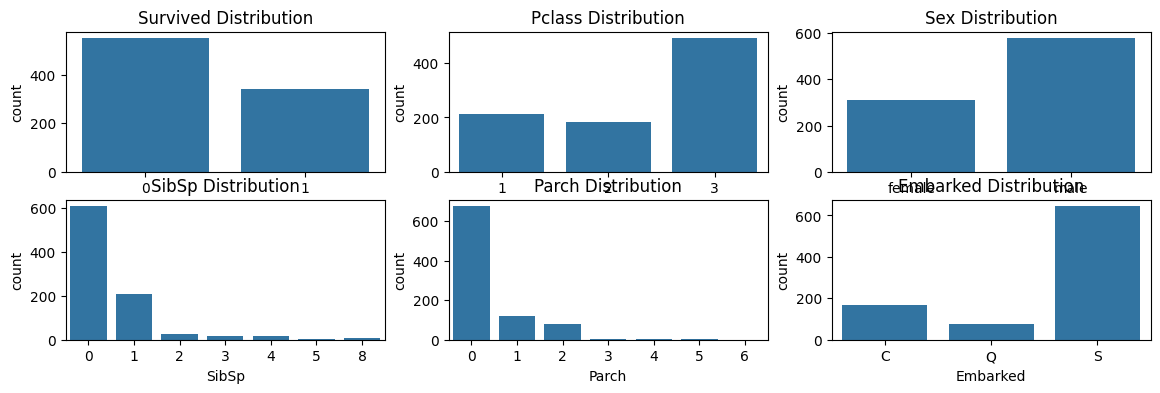

In [125]:
plt.figure(figsize=(14,4))
for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")

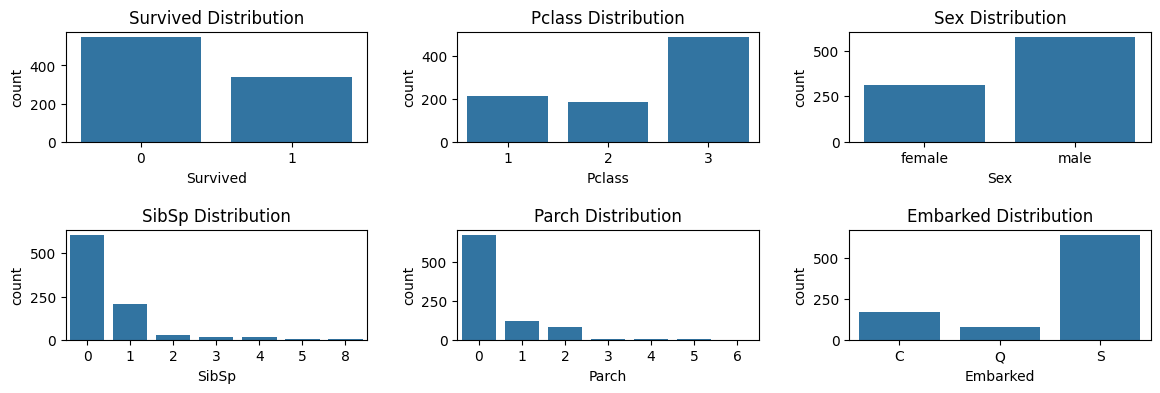

In [126]:
plt.figure(figsize=(14,4))
for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

In [127]:
unique = df['Survived'].value_counts()
count = unique.values
cat = unique.index
cat

CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category', name='Survived')

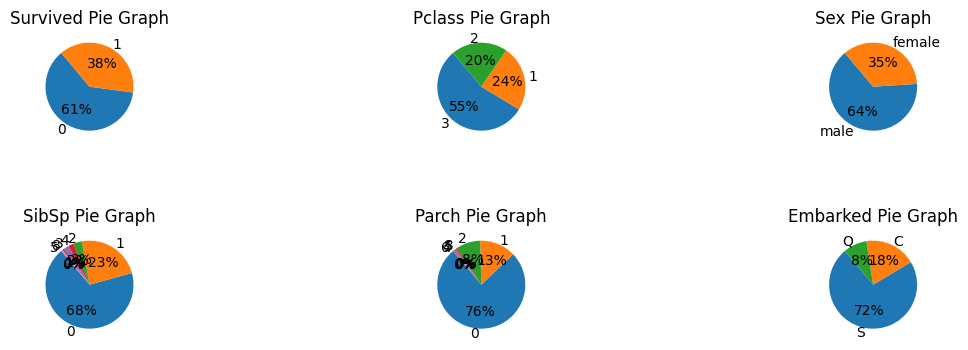

In [128]:
plt.figure(figsize=(14,4))
for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    unique = df[col].value_counts()
    count = unique.values
    catrgories = unique.index
    plt.pie(count,labels= catrgories,startangle=130, autopct='%1.1d%%')
    plt.title(f"{col} Pie Graph")
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

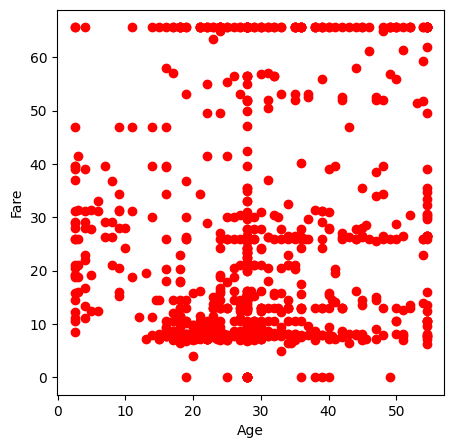

In [129]:
# scatter plot
plt.figure(figsize=(5,5))
plt.scatter(df["Age"],df["Fare"],c="red")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

In [130]:
corr = df[['Age','Fare']].corr()
corr

,Age,Fare
Age,1.000000,0.139065
Fare,0.139065,1.000000


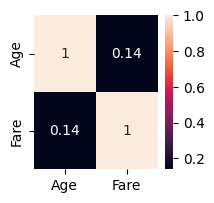

In [131]:
corr = df[['Age','Fare']].corr()
plt.figure(figsize=(2,2))
sns.heatmap(corr,annot=True)
plt.show()

Sex,female,male
Survived,,
0,81,468
1,231,109


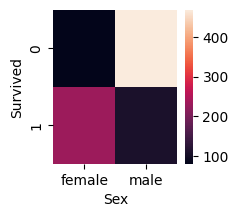

In [132]:
plt.figure(figsize=(2,2))
agg = df.pivot_table(index='Survived',columns='Sex',values='Age',aggfunc=len)
sns.heatmap(agg)
plt.show
agg

In [133]:
df.duplicated().sum()

np.int64(129)

In [134]:
df.drop_duplicates(inplace=True)

In [135]:
df.duplicated().sum()

np.int64(0)

In [136]:
X = df.drop("Survived",axis=1)
X.head()
# X = df [:,:]
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [137]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6563,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [138]:
X = df.iloc[:, 1:]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6563,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [139]:
y = df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 760, dtype: category
Categories (2, int64): [0, 1]

In [140]:
# y = df.iloc[:, df.columns = 'Age','']
# y

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
scaler = MinMaxScaler()
num_cols = X.select_dtypes("number").columns
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

In [143]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.375000,1,0,0.110424,S
1,1,female,0.682692,1,0,1.000000,C
2,3,female,0.451923,0,0,0.120704,S
3,1,female,0.625000,1,0,0.808757,S
4,3,male,0.625000,0,0,0.122608,S


In [145]:
from category_encoders import OneHotEncoder

In [146]:
str_c = ['Sex','Embarked']
encoder = OneHotEncoder(cols= str_c, drop_invariant=True)
X = encoder.fit_transform(X)
X.head()

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,0.375000,1,0,0.110424,1,0,0
1,1,0,1,0.682692,1,0,1.000000,0,1,0
2,3,0,1,0.451923,0,0,0.120704,1,0,0
3,1,0,1,0.625000,1,0,0.808757,1,0,0
4,3,1,0,0.625000,0,0,0.122608,1,0,0
